# DOCUMENTAZIONE DELLA FONTE

il dataset scelto è recuperato da Kaggle, contiene i report dei crimini commessi a Los Angeles dal 2022 al Dicembre 2023 definendone l'area, la data, i dati della vittima, il modus operandi dell'assassino e l'arma che è stata utilizzata.

In [213]:
#importazione di tutte le libreire necessarie
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [214]:
#salvataggio del dataset
df = pd.read_csv(r'Crime_from2020.csv')
df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [215]:
#stampa delle prime informazioni come: tipi di dato delle colonne 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   division_number      852950 non-null  int64  
 1   date_reported        852950 non-null  object 
 2   date_occurred        852950 non-null  object 
 3   area                 852950 non-null  int64  
 4   area_name            852950 non-null  object 
 5   reporting_district   852950 non-null  int64  
 6   part                 852950 non-null  int64  
 7   crime_code           852950 non-null  int64  
 8   crime_description    852950 non-null  object 
 9   modus_operandi       734639 non-null  object 
 10  victim_age           852950 non-null  int64  
 11  victim_sex           740344 non-null  object 
 12  victim_descent       740336 non-null  object 
 13  premise_code         852940 non-null  float64
 14  premise_description  852432 non-null  object 
 15  weapon_code      

In [216]:
#e gli eventuali valori nulli
df.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

# Ridimensionamento del df in base alle esigenze 

In [217]:
colonne_da_mantenere = ["date_reported", "area", "area_name", "crime_code", "crime_description", "victim_age", "premise_code", "premise_description", "weapon_code", "weapon_description"]
df2 = df[colonne_da_mantenere].copy()
df2.to_csv("df2-file.csv", index=False)  


In [218]:
#eliminazione dei valori nulli per analisi dei dati migliore
df2 = df2.dropna()

In [219]:
#modifica dei tipi di dati per renderli più consoni
df2['date_reported'] = pd.to_datetime(df2['date_reported'])

df2['area_name'] = df2['area_name'].astype(str)
df2['crime_description'] = df2['crime_description'].astype(str)
df2['premise_description'] = df2['premise_description'].astype(str)

In [220]:
# Riempimento valori mancanti in premise_description
df2['premise_description'].fillna('', inplace=True)

#in weapon_code e weapon_description
df2['weapon_code'].fillna(0, inplace=True)
df2['weapon_description'].fillna('', inplace=True)

In [221]:
df2

,date_reported,area,area_name,crime_code,crime_description,victim_age,premise_code,premise_description,weapon_code,weapon_description
0,2020-01-08,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,2020-01-02,1,Central,624,BATTERY - SIMPLE ASSAULT,25,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON
5,2020-01-02,1,Central,121,"RAPE, FORCIBLE",25,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON
10,2020-01-04,1,Central,330,BURGLARY FROM VEHICLE,29,101.0,STREET,306.0,ROCK/THROWN OBJECT
11,2020-01-05,1,Central,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,108.0,PARKING LOT,511.0,VERBAL THREAT
...,...,...,...,...,...,...,...,...,...,...
852930,2023-08-27,15,N Hollywood,761,BRANDISH WEAPON,38,101.0,STREET,200.0,KNIFE WITH BLADE 6INCHES OR LESS
852935,2023-07-24,6,Hollywood,210,ROBBERY,23,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
852938,2023-09-20,9,Van Nuys,624,BATTERY - SIMPLE ASSAULT,44,738.0,LIBRARY,500.0,UNKNOWN WEAPON/OTHER WEAPON
852945,2023-03-22,16,Foothill,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"


In [222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296560 entries, 0 to 852946
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_reported        296560 non-null  datetime64[ns]
 1   area                 296560 non-null  int64         
 2   area_name            296560 non-null  object        
 3   crime_code           296560 non-null  int64         
 4   crime_description    296560 non-null  object        
 5   victim_age           296560 non-null  int64         
 6   premise_code         296560 non-null  float64       
 7   premise_description  296560 non-null  object        
 8   weapon_code          296560 non-null  float64       
 9   weapon_description   296560 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 24.9+ MB


In [223]:
df2.isnull().sum()

date_reported          0
area                   0
area_name              0
crime_code             0
crime_description      0
victim_age             0
premise_code           0
premise_description    0
weapon_code            0
weapon_description     0
dtype: int64

# OBBIETTIVO_1

analizzare i dati per trovare un "canone" di crimini, ovvero dove avvengono più spesso, in quale periodo ecc

-- CRIMINI PER AREA

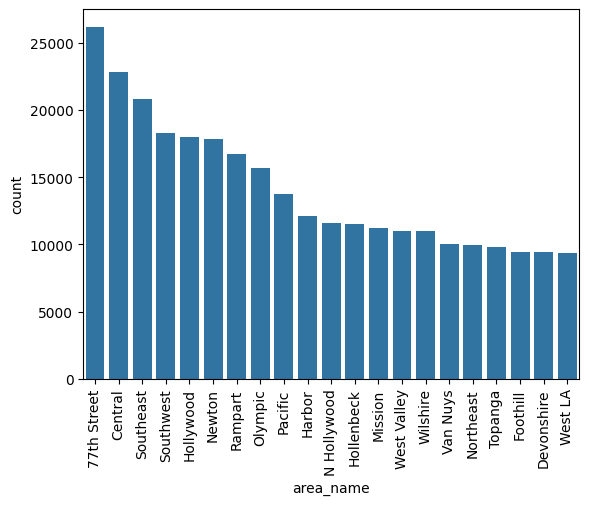

In [224]:
sns.countplot (x="area_name", data=df2, order=df2["area_name"].value_counts ().index)
plt.xticks (rotation=90)
plt.show ()

-- CRIMINI PER MESE E ANNO DI SEGNALAZIONE

C:\Users\marti\AppData\Local\Temp\ipykernel_18592\2035350013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="month_year", data=df2, order=month_year_counts.index, palette="viridis")


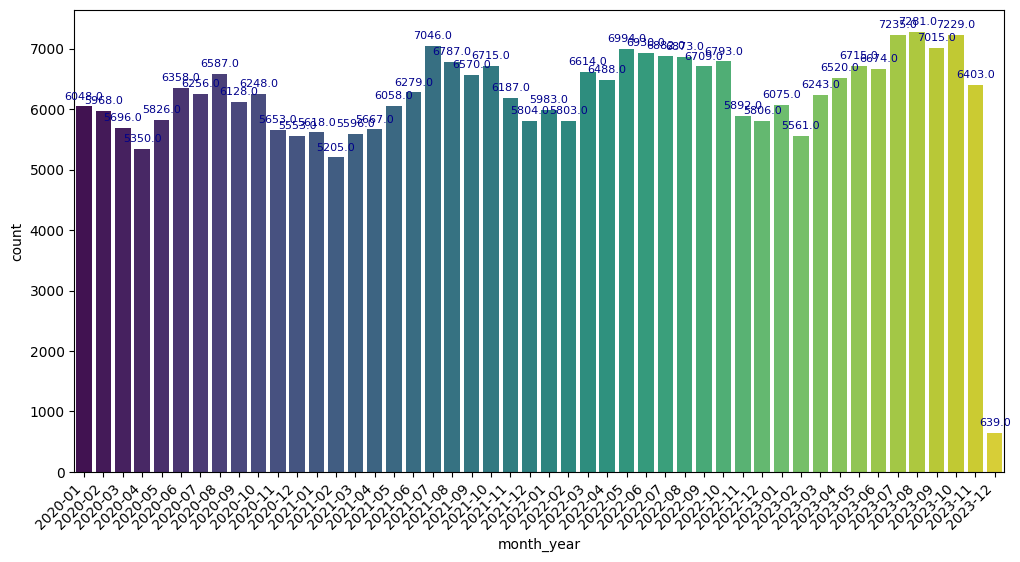

In [225]:
# Estrazione del mese e dell'anno dalla colonna 'date_reported'
df2['month_year'] = df2['date_reported'].dt.to_period('M')

# Calcolo delle frequenze dei mesi e anni di segnalazione e ordinamento 
month_year_counts = df2['month_year'].value_counts().sort_index()

# Countplot basato sulla data di segnalazione
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="month_year", data=df2, order=month_year_counts.index, palette="viridis")

# Rotazione delle etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha="right")

# Aggiunta delle etichette dei valori sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='darkblue', xytext=(0, 5),
                textcoords='offset points')
plt.show()

-- CRIMINI PER ETA' DELLE VITTIME

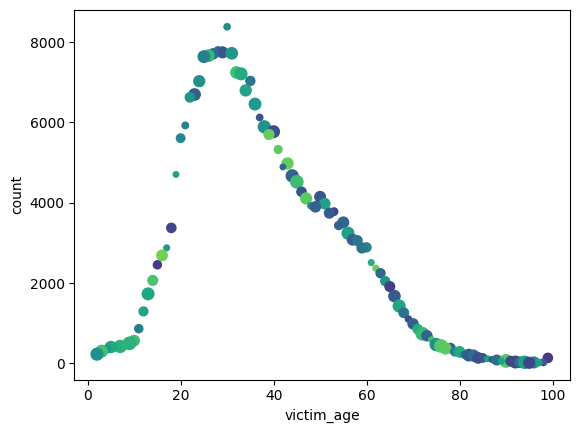

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# Filtraggio dell'età delle vittime in modo che siano comprese tra 1 e 100
filtered_df = df2[(df2['victim_age'] > 1) & (df2['victim_age'] < 100)]

# Calcolo delle frequenze delle età nel DataFrame filtrato
age_counts = filtered_df['victim_age'].value_counts()

# Estrazione  dei valori e le relative frequenze
x_axes = age_counts.index
y_axes = age_counts.values

# Plot
sizes = np.random.uniform(15, 80, len(x_axes))
colors = np.random.uniform(15, 80, len(x_axes))
plt.scatter(x_axes, y_axes, s=sizes, c=colors, vmin=0, vmax=100)

plt.xlabel('victim_age')
plt.ylabel('count')

plt.show()


-- CRIMINI PER TIPO

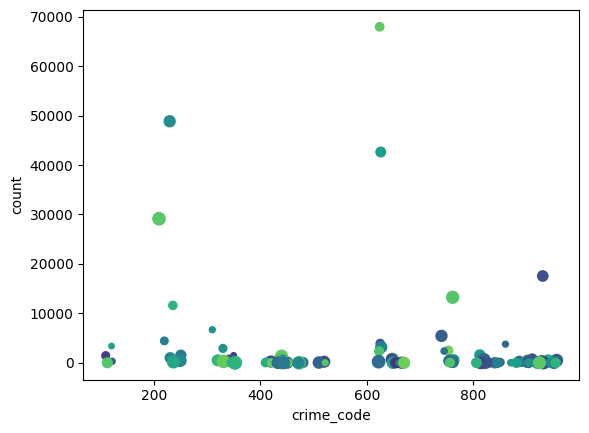

In [227]:
# Calcolo delle frequenze dei crime_code nel DataFrame filtrato
crime_counts = df2['crime_code'].value_counts()

# Estrazione dei valori e relative frequenze
x_axes = crime_counts.index
y_axes = crime_counts.values

# Plot
sizes = np.random.uniform(15, 80, len(x_axes))
colors = np.random.uniform(15, 80, len(x_axes))
plt.scatter(x_axes, y_axes, s=sizes, c=colors, vmin=0, vmax=100)

plt.xlabel('crime_code')
plt.ylabel('count')

plt.show()


In [228]:
#mi faccio restituire il crime code esatto
crime_counts = df2['crime_code'].value_counts()
crime_code_max_count = crime_counts.idxmax()

print(f"Il crime_code con il conteggio massimo è: {crime_code_max_count}")
#cerco la corrispondenza del crime_code al suo rispettivo crime_description
crime_code_624_description = df2[df2['crime_code'] == 624]['crime_description'].iloc[0]
print(f"crime_description for crime_code 624: {crime_code_624_description}")

Il crime_code con il conteggio massimo è: 624
crime_description for crime_code 624: BATTERY - SIMPLE ASSAULT


-- CRIMINI PER ARMA 

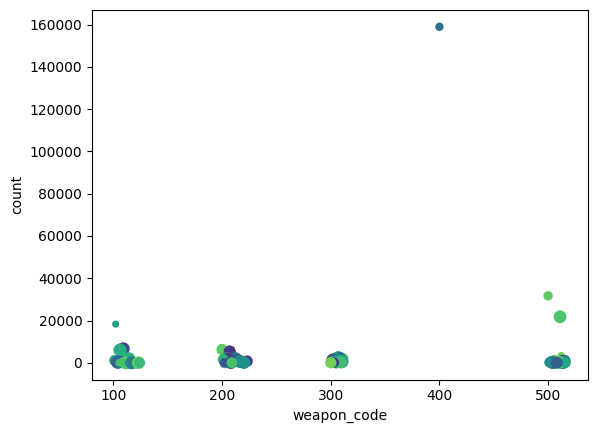

In [229]:
# Filtraggio del DataFrame escludendo i weapon code uguali a zero
filtered_df = df2[df2['weapon_code'] != 0]

# Calcolo delle frequenze dei weapon code nel DataFrame filtrato
weapon_counts = filtered_df['weapon_code'].value_counts()

# Estrazione dei valori e relative frequenze
x_axes = weapon_counts.index
y_axes = weapon_counts.values

# Plot
sizes = np.random.uniform(15, 80, len(x_axes))
colors = np.random.uniform(15, 80, len(x_axes))
plt.scatter(x_axes, y_axes, s=sizes, c=colors, vmin=0, vmax=100)

plt.xlabel('weapon_code')
plt.ylabel('count')

plt.show()


In [230]:
filtered_df = df2[df2['weapon_code'] != 0]
weapon_counts = filtered_df['weapon_code'].value_counts()
weapon_code_max_count = weapon_counts.idxmax()
print(f"Il weapon_code con il conteggio massimo (escludendo 0) è: {weapon_code_max_count}")
weapon_code_400_description = df2[df2['weapon_code'] == 400]['weapon_description'].iloc[0]
print(f"weapon_description for weapon_code 400: {weapon_code_400_description}")

Il weapon_code con il conteggio massimo (escludendo 0) è: 400.0
weapon_description for weapon_code 400: STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)


-- CRIMINI PER LUOGO

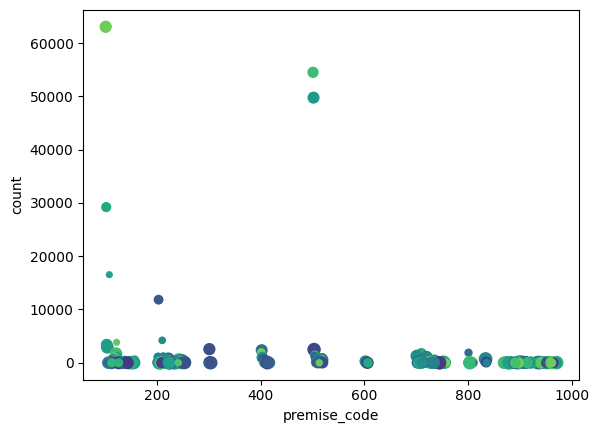

In [231]:
# Calcolo delle frequenze dei crime_code nel DataFrame filtrato
premise_counts = df2['premise_code'].value_counts()

# Estrazione dei valori e relative frequenze
x_axes = premise_counts.index
y_axes = premise_counts.values

# Plot
sizes = np.random.uniform(15, 80, len(x_axes))
colors = np.random.uniform(15, 80, len(x_axes))
plt.scatter(x_axes, y_axes, s=sizes, c=colors, vmin=0, vmax=100)

plt.xlabel('premise_code')
plt.ylabel('count')

plt.show()


In [232]:
premise_counts = df2['premise_code'].value_counts()
premise_code_max_count = premise_counts.idxmax()
print(f"Il premise_code con il conteggio massimo è: {premise_code_max_count}")
premise_code_101_description = df2[df2['premise_code'] == 101.0]['premise_description'].iloc[0]
print(f"premise_description for premise_code 101: {premise_code_101_description}")

Il premise_code con il conteggio massimo è: 101.0
premise_description for premise_code 101: STREET


# Conclusione

I CRIMINI SONO AVVENUTI PRINCIPALMENTE:<br>
a 77th Street di Los Angeles, <br>
nel Maggio del 2022, <br>
le vittime hanno età tra i 20 e 40 anni, <br>
tipo di crimine: assalto  <br>
mezzo per crimine: violenza fisica <br>
luogo del crimine: per strada <br>

# OBBIETTIVO_2

trovare un'eventuale correlazione tra i dati e analizzarla

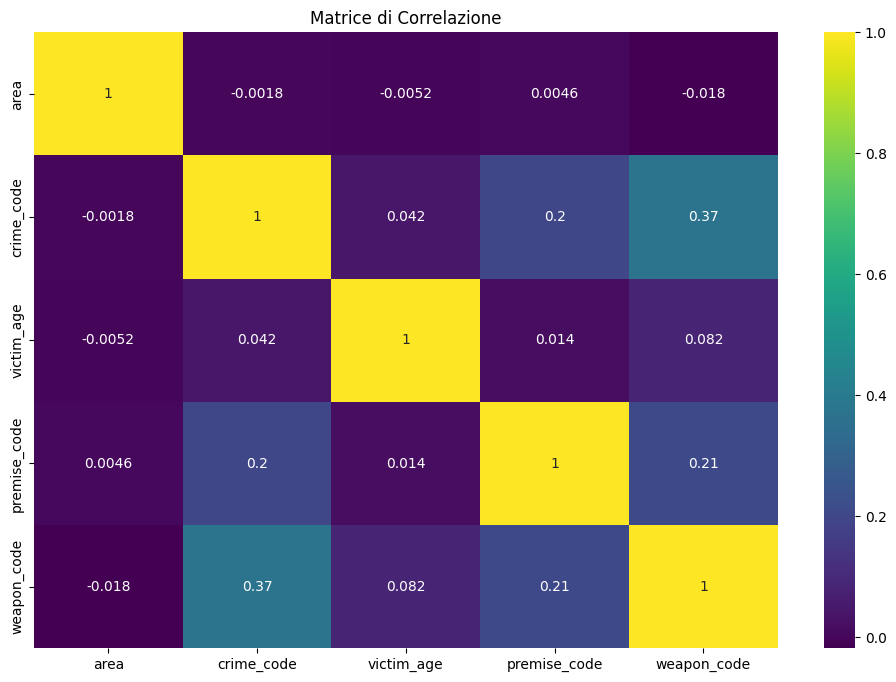

In [233]:
# Esclusione colonne non numeriche
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df2[numeric_columns].corr()

# heatmap utilizzando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

plt.title('Matrice di Correlazione')
plt.show()


la correlazione tra crime_code e weapon_code è molto alta, quindi si andrà ad analizzare

In [234]:
#outcome 1 se c'è almeno un dato frequnte frequente, altrimenti 0
df2['outcome'] = np.where((df2['crime_code'] == 624) | ((df2['weapon_code'] == 400) & (df2['weapon_code'] != 0)), 1, 0)

In [235]:
#cambiare tipo di dato di outcome da categorico a intero
df2["outcome"] = df2["outcome"].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296560 entries, 0 to 852946
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_reported        296560 non-null  datetime64[ns]
 1   area                 296560 non-null  int64         
 2   area_name            296560 non-null  object        
 3   crime_code           296560 non-null  int64         
 4   crime_description    296560 non-null  object        
 5   victim_age           296560 non-null  int64         
 6   premise_code         296560 non-null  float64       
 7   premise_description  296560 non-null  object        
 8   weapon_code          296560 non-null  float64       
 9   weapon_description   296560 non-null  object        
 10  month_year           296560 non-null  period[M]     
 11  outcome              296560 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4), period[M](1)

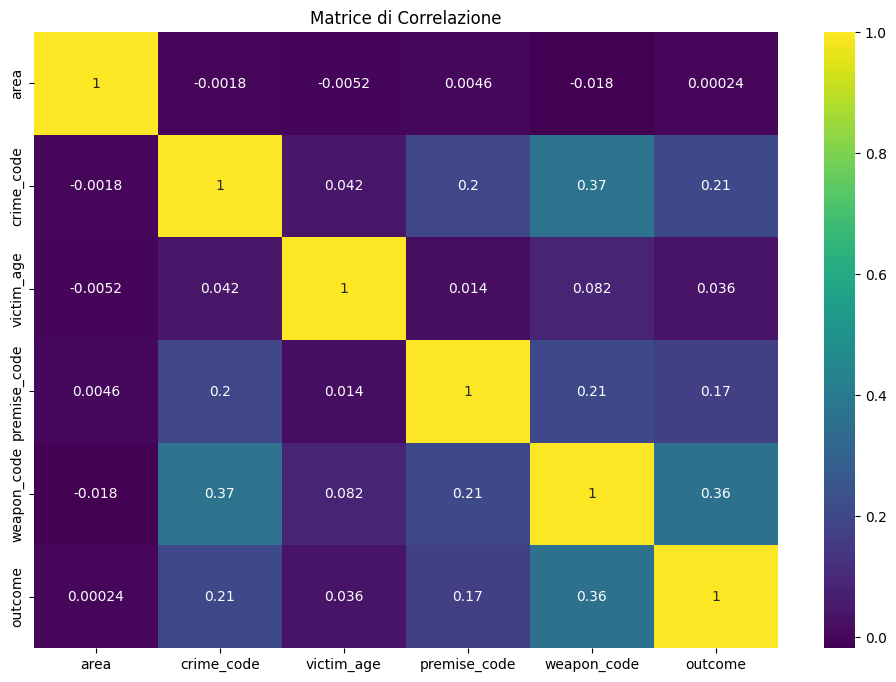

In [236]:
# Esclusione colonne non numeriche
numeric_columns = df2.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_matrix = df2[numeric_columns].corr()

# heatmap utilizzando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

plt.title('Matrice di Correlazione')
plt.show()

-- REGRESSIONE LOGISTICA, weapon_code

In [237]:
# X contiene le colonne features
X = df2[['weapon_code']]
# y contiene la colonna target (esito)
y = df2['outcome']

In [238]:
# dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
# Standardizzazione delle features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
# modello di regressione logistica
model = LogisticRegression()

In [241]:
# Addestramento del modello
model.fit(X_train, y_train)

LogisticRegression()

In [242]:
# previsioni sul set di test
y_pred = model.predict(X_test)

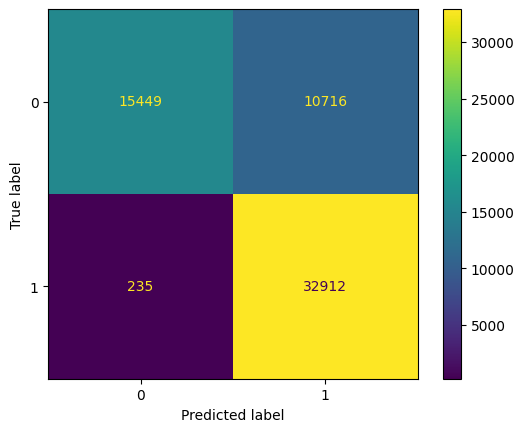

In [243]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [244]:
accuracy =accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}".format(accuracy))

accuracy: 0.82


-- REGRESSIONE LOGISTICA, crime_code

In [245]:
# X contiene le colonne features
X = df2[['crime_code']]
y = df2['outcome']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [249]:
# previsioni sul set di test
y_pred = model.predict(X_test)

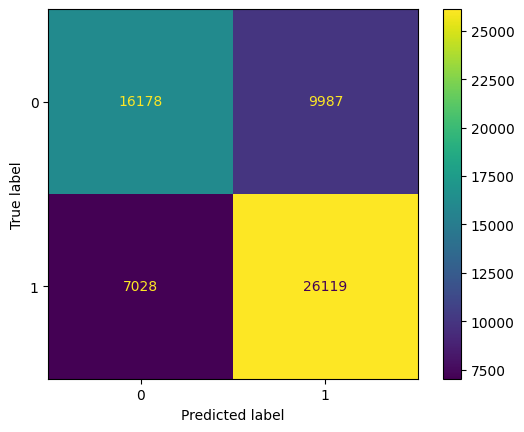

In [250]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [251]:
accuracy =accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}".format(accuracy))

accuracy: 0.71
